In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_tp = '../../../Data/Matthews2017/Digitized/PK/'
dataTP_10mg = pd.read_csv(path_tp + '10mg_TP.csv')
dataTP_30mg = pd.read_csv(path_tp + '30mg_TP.csv')
dataTP_1mg = pd.read_csv(path_tp + '1mg_TP.csv')
dataTP_2mg = pd.read_csv(path_tp + '2mg_TP.csv')

#dataTP_05mg = dataTP_05mg.dropna(axis='columns')
dataTP_1mg = dataTP_1mg.dropna(axis='columns')
dataTP_2mg = dataTP_2mg.dropna(axis='columns')
dataTP_10mg = dataTP_10mg.dropna(axis='columns')
dataTP_30mg = dataTP_30mg.dropna(axis='columns')

#dataTP_05mg.columns = ['time','conc']
dataTP_1mg.columns = ['time','conc']
dataTP_2mg.columns = ['time','conc']
dataTP_10mg.columns = ['time','conc']
dataTP_30mg.columns = ['time','conc']

data_TP = [dataTP_10mg, dataTP_30mg, dataTP_2mg, dataTP_1mg]

dose = 3410 # nM
z0 = [[10*dose,0,0,0],[30*dose,0,0,0],[2*dose,0,0,0], [dose,0,0,0]]

#convert to unit nM
for n in range(len(z0)): #to nM    
    data_TP[n].conc = 6 - np.log10(180) + data_TP[n].conc.tolist()

t_observed_TP = []; z_observed_TP = []
for d in range(len(z0)):
    t_observed_TP.append(data_TP[d].time.tolist())
    z_observed_TP.append(data_TP[d].conc.tolist())

In [3]:
#Calculate slope of concentration decay
slope = []
y = []
for j in range(len(z_observed_TP)):
    m_, intercept_ = np.polyfit(t_observed_TP[j][1:], z_observed_TP[j][1:], 1) #fit polynomial function
    m = -np.log(10)*m_
    slope.append(m)
    print('model ',j ,' with slope = ',m)
    #intercept.append(intercept_)
    print('log interception = ',intercept_)
    y_ = []
    [y_.append(m_*(int(round(t_observed_TP[0][i])))+intercept_) for i in range(len(t_observed_TP[j]))]
    y.append(y_)
    print()

model  0  with slope =  0.005217915002949024
log interception =  4.127544275152155

model  1  with slope =  0.00759462560065275
log interception =  4.783257997246996

model  2  with slope =  0.005648965858644767
log interception =  3.4193201418726082

model  3  with slope =  0.005720413255134938
log interception =  3.3181303759290905



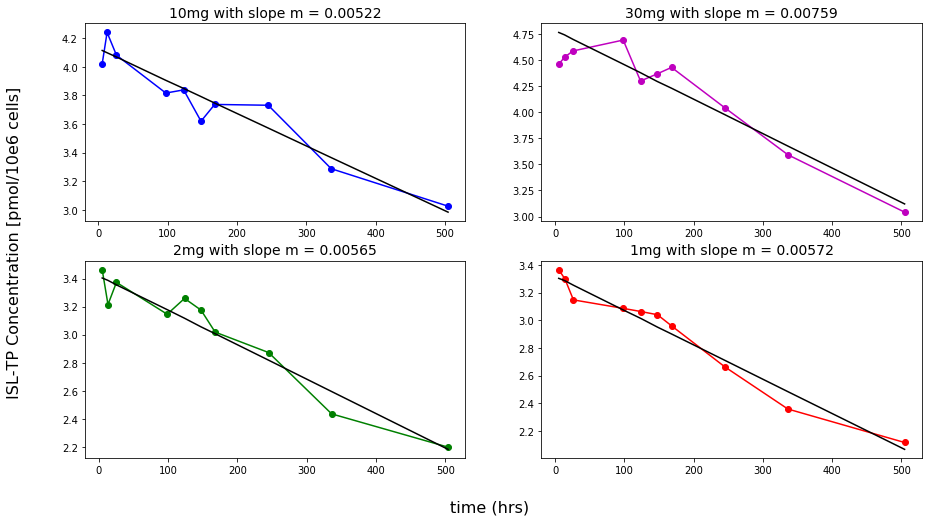

In [4]:
#plot result
fig, axs = plt.subplots(2, 2, figsize=(15, 8));
axs[0, 0].plot(t_observed_TP[0], z_observed_TP[0], 'bo-',t_observed_TP[0], y[0], 'black');
axs[0, 0].set_title(f'10mg with slope m = {round(slope[0],5)}',fontsize=14);
axs[0, 1].plot(t_observed_TP[1], z_observed_TP[1], 'mo-',t_observed_TP[1], y[1], 'black');
axs[0, 1].set_title(f'30mg with slope m = {round(slope[1],5)}',fontsize=14);
axs[1, 0].plot(t_observed_TP[2], z_observed_TP[2], 'go-', t_observed_TP[2], y[2], 'black');
axs[1, 0].set_title(f'2mg with slope m = {round(slope[2],5)}',fontsize=14);
axs[1, 1].plot(t_observed_TP[3], z_observed_TP[3], 'ro-', t_observed_TP[3], y[3], 'black');
axs[1, 1].set_title(f'1mg with slope m = {round(slope[3],5)}',fontsize=14);

fig.text(0.5, 0.04, 'time (hrs)', ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, 'ISL-TP Concentration [pmol/10e6 cells]', ha='center', va='center', rotation='vertical', fontsize=16);